In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import Adam_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300
m1 = np.array([3, 0])
m2 = np.array([-3, 0])
Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[1, 0], [0, 1]])

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = MixNormalRV([0.5, 0.5], [m1, m2], [Sigma1, Sigma2])

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 1000
Niter = 3*int(1e4)
alpha_Adam = 1e-2
nexperiments = 200
results_array_Adam = []
distribution_array_Adam = []
for _ in range(nexperiments):
    r_Adam, d_Adam = Adam_OAIS(phi, pi, q, N, Niter, alpha=alpha_Adam)
    results_array_Adam.append(r_Adam)
    distribution_array_Adam.append(d_Adam)


100%|██████████| 30000/30000 [04:50<00:00, 103.38it/s]


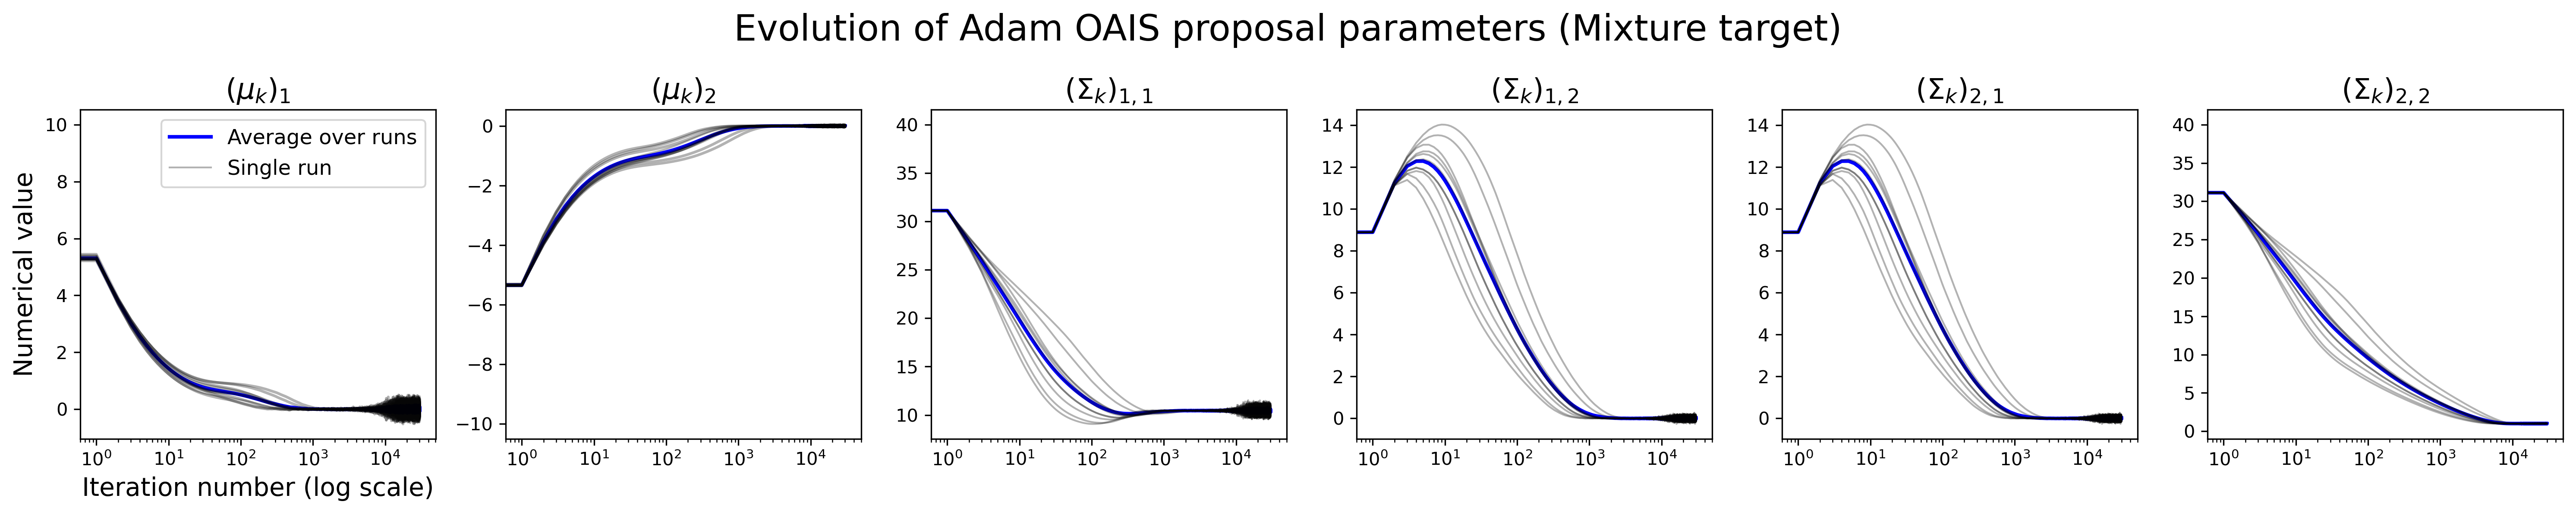

In [2]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "Adam"
title = f"Evolution of {optimiser if optimiser != 'SGD' else 'SGD'} OAIS proposal parameters (Mixture target)"
plotter(distribution_array_Adam, pi, title=title, mix=True, alpha=0.3, red_lines=False)
plt.show()

In [9]:
GT = mcsim(phi, pi, N=int(1e6))

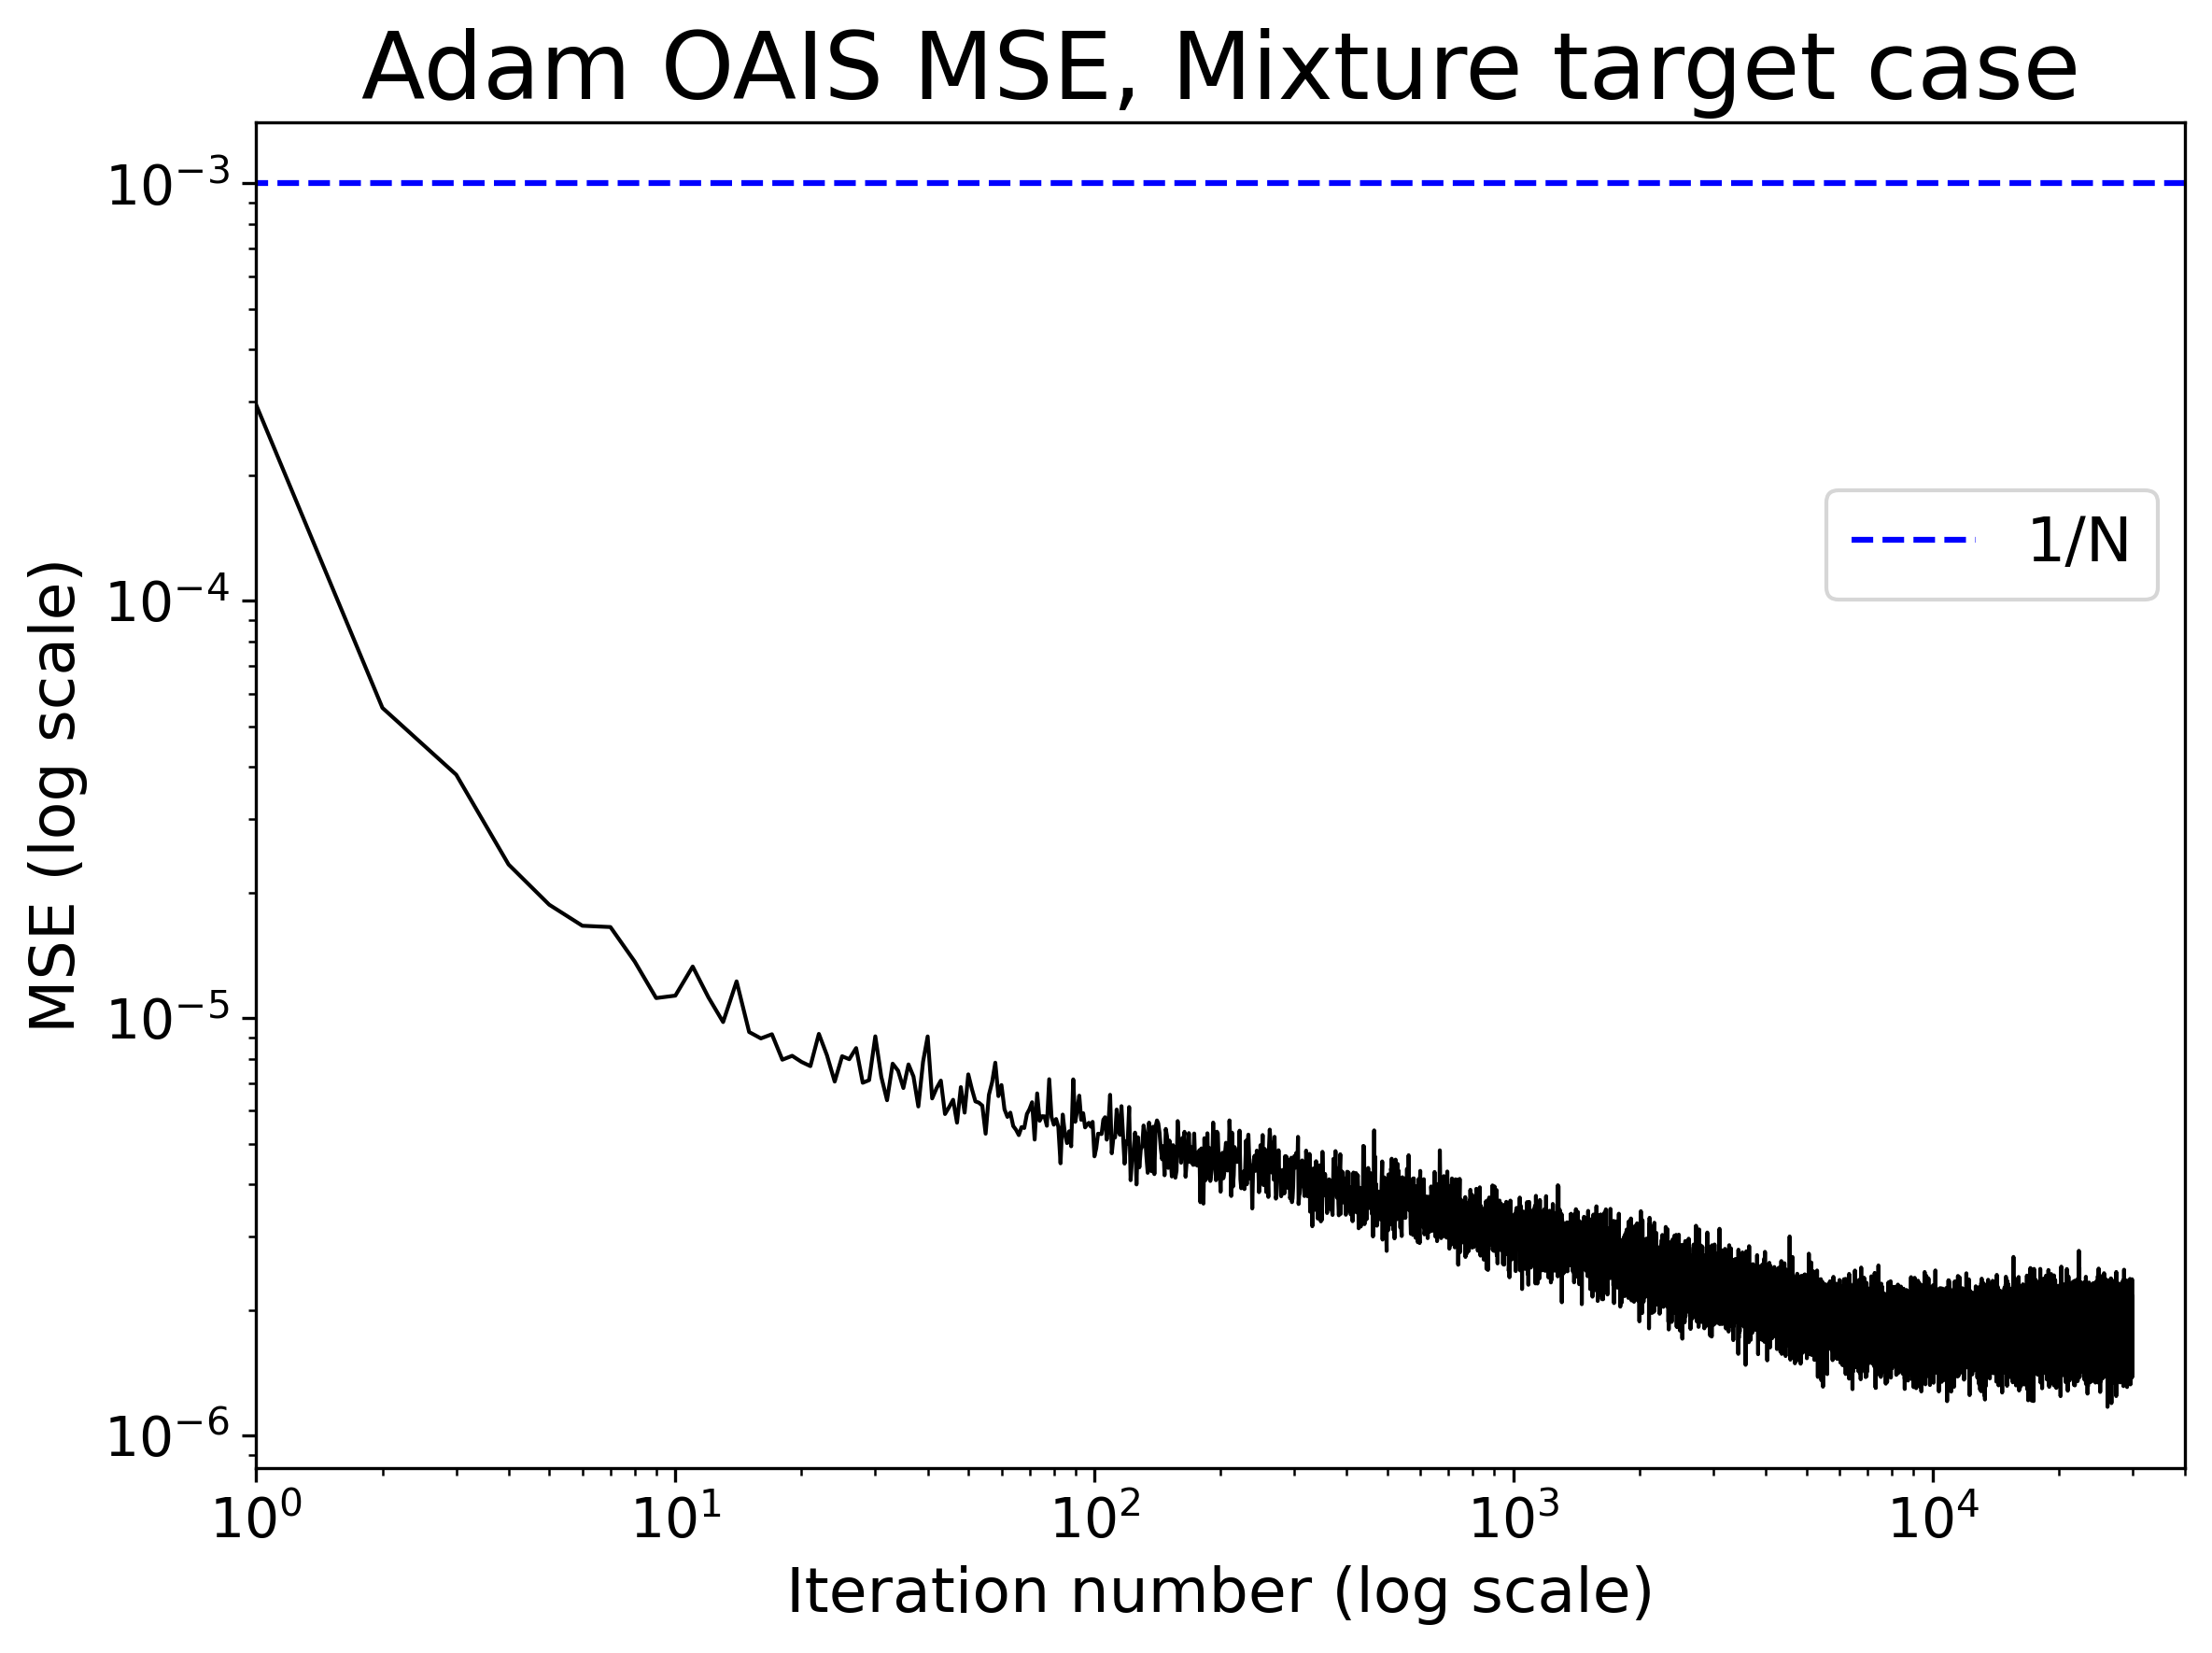

In [12]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "Adam"
title_mse = f"{optimiser if optimiser != 'SGD' else 'SG'} OAIS MSE, Mixture target case"
plot_mse(results_array_Adam, GT, "", xlog=True, ylog=True)
plt.title(title_mse, fontsize=24)
plt.hlines(1/N, 0, Niter+10000, colors="blue", linestyles='dashed', label="1/N")
# move legend above center right inside plot
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 0.75), fancybox=True, ncol=5, fontsize=16)
plt.tight_layout()
plt.xlim(1, Niter+10000)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/Adam/{optimiser}_mse.png")
plt.show()